  # Machine Learning Final Lab/CAC3

  <hr/>

  Submitted by <br>
  Name: **Sandeep Jabez** <br>
  Register Number: **20112029** <br>
  Class: **4BScDS** <br> 
  <hr/>








## Lab Overview  
### Objectives
• Find out a Dataset, and compare at least two different algorithms and choose the best one

• Use suitable Data Preprocessing and Feature Selection/Engineering Methods

• Fine tune the model and hyper parameters and Finalise the Model

• Make the model deployment-ready by giving User-Input provision

## Approach
My approach to this is to find a dataset first and do some preprocessing. Then I will try to find if there are any missing data. For the two different algorithms I am going to use Logistic Regression and Support Vector Machine. 


In [ ]:
# pip install seaborn

## Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# import SVM
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
# import encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA


In [3]:
df=pd.read_csv('airline.csv')


In [ ]:
df=df.sample(n=100000,random_state=1)



In [ ]:
df.head()
# print all the unique values in the dataframe
for i in range(len(df.columns)):
    print(df.columns[i],df.iloc[:,i].unique())




satisfaction ['dissatisfied' 'satisfied']
Gender ['Male' 'Female']
Customer Type ['Loyal Customer' 'disloyal Customer']
Age [49 37 43 47 56 33 57 67 41 45 29 26 51 16 21 32 14 61 59 34 50 20 68 44
 42 36 31 48 55 39 53 15 62 25 70 60 19 18 52 27 23 54 24 66 30  7 28 69
 22 64 10 40 38 13 35  9 58 12 46 11 65 17 79 85 63  8 71 75 77 72 80 76
 78 74 73]
Type of Travel ['Personal Travel' 'Business travel']
Class ['Eco' 'Business' 'Eco Plus']
Flight Distance [2501 1624 1755 ... 4422 5386 5302]
Seat comfort [3 4 0 1 2 5]
Departure/Arrival time convenient [4 0 3 5 2 1]
Food and drink [2 4 0 1 3 5]
Gate location [3 2 1 4 5 0]
Inflight wifi service [5 2 1 3 4 0]
Inflight entertainment [2 4 1 5 3 0]
Online support [5 2 3 4 1 0]
Ease of Online booking [5 2 1 3 4 0]
On-board service [4 1 5 2 3 0]
Leg room service [4 1 3 5 2 0]
Baggage handling [4 1 3 5 2]
Checkin service [3 5 1 2 4 0]
Cleanliness [4 1 5 3 2 0]
Online boarding [5 2 1 3 4 0]
Departure Delay in Minutes [   0   12   15   16  192   89

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 24303 to 25405
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       100000 non-null  object 
 1   Gender                             100000 non-null  object 
 2   Customer Type                      100000 non-null  object 
 3   Age                                100000 non-null  int64  
 4   Type of Travel                     100000 non-null  object 
 5   Class                              100000 non-null  object 
 6   Flight Distance                    100000 non-null  int64  
 7   Seat comfort                       100000 non-null  int64  
 8   Departure/Arrival time convenient  100000 non-null  int64  
 9   Food and drink                     100000 non-null  int64  
 10  Gate location                      100000 non-null  int64  
 11  Inflight wifi service              1

In [ ]:
df.shape

(100000, 23)

In [ ]:
df.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             299
dtype: int64

EDA


In [ ]:
df.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


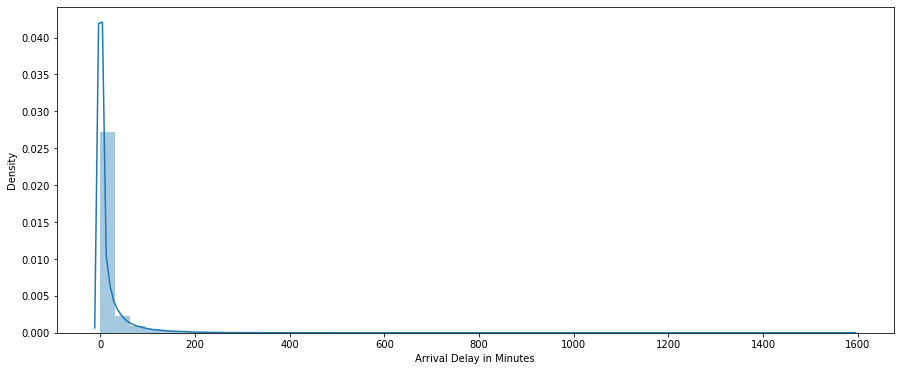

In [ ]:
fig = plt.figure(figsize=(15,6))
sns.distplot(df['Arrival Delay in Minutes']); 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


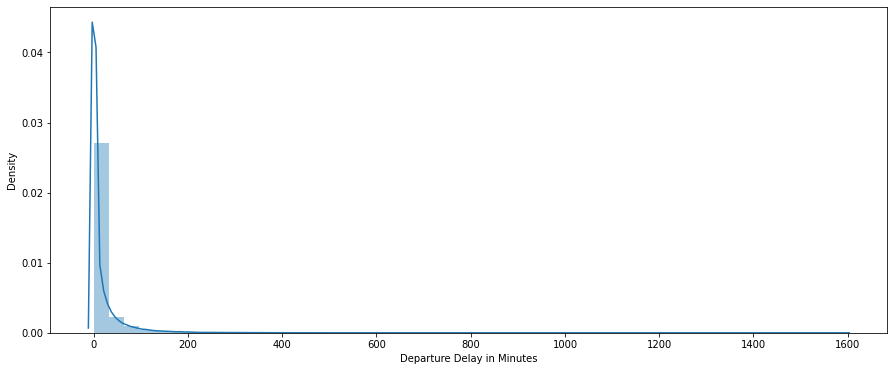

In [ ]:
fig = plt.figure(figsize=(15,6))
sns.distplot(df['Departure Delay in Minutes']); 
plt.show()

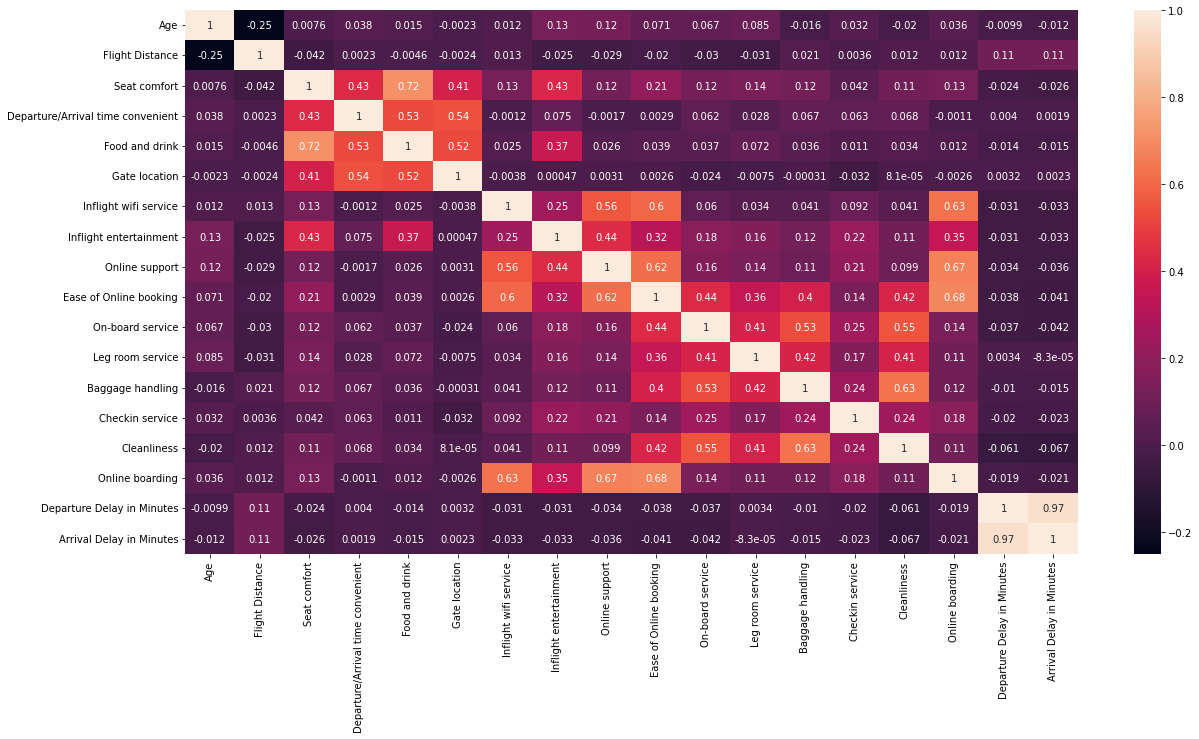

In [ ]:
#heatmap
# increase size
plt.rcParams['figure.figsize'] = (20, 10)
sns.heatmap(df.corr(),annot=True)


The heat map shows us the correlation between our variables.
Only some variables have higher correlation and most of our variables less correlation. We also have some variables which has negative correlation.

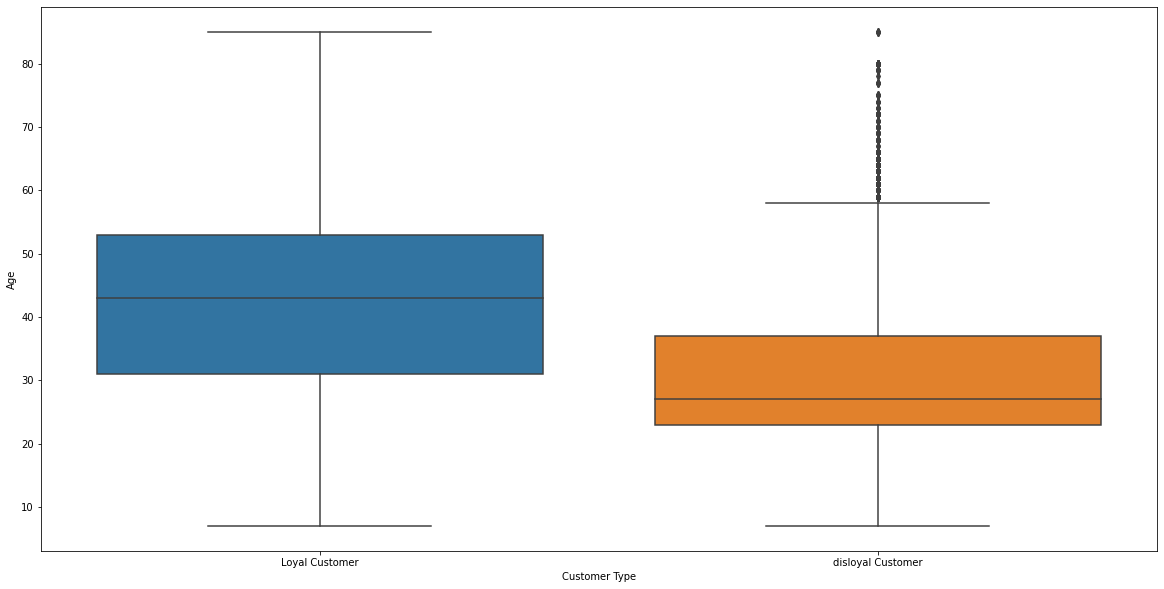

In [ ]:
sns.boxplot(data = df, x='Customer Type', y='Age')

The boxplot tells us that we have significantly higher number of Loyal customers. The airline has more regular customers, which hints us that the customers like the airline service and are satisfied.

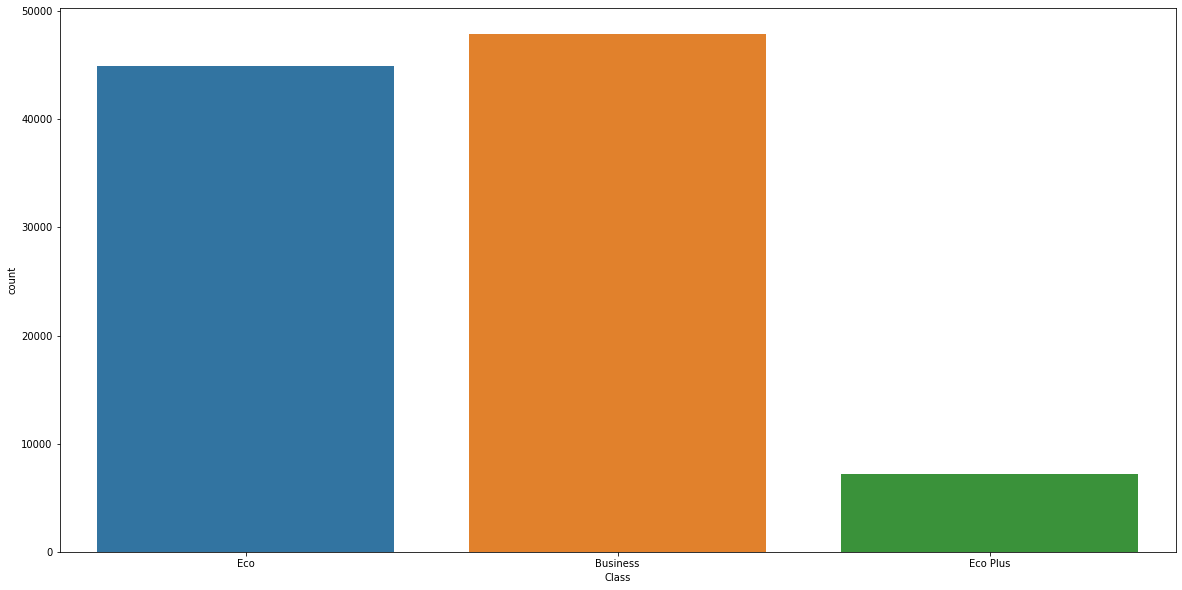

In [ ]:
sns.countplot(data = df, x = 'Class')


Here we have three classes, most of the customers belong to the business and eco class. We have roughly higher number of business class people. 

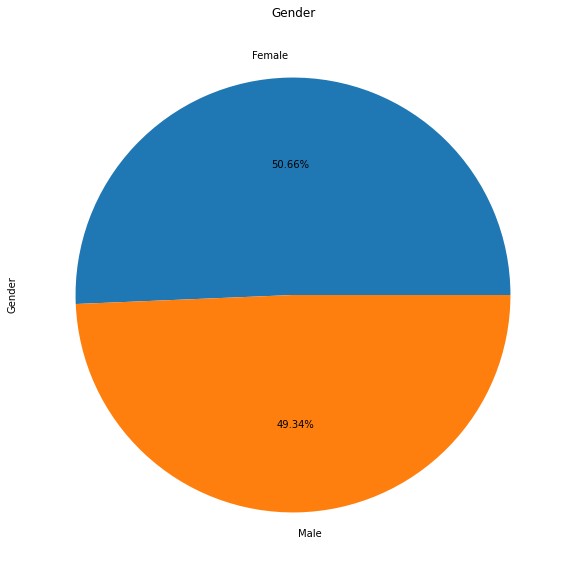

In [ ]:

plt.figure(figsize=(10,10))
plt.title("Gender")
df["Gender"].value_counts().plot(kind="pie",autopct='%1.2f%%')

Our data is not gender biased, and we have approximately equal proportion.


In [ ]:
# sns.lmplot(x="Class", y="Flight Distance", data=df)
# plt.show()

We will do Encoding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 24303 to 25405
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       100000 non-null  object 
 1   Gender                             100000 non-null  object 
 2   Customer Type                      100000 non-null  object 
 3   Age                                100000 non-null  int64  
 4   Type of Travel                     100000 non-null  object 
 5   Class                              100000 non-null  object 
 6   Flight Distance                    100000 non-null  int64  
 7   Seat comfort                       100000 non-null  int64  
 8   Departure/Arrival time convenient  100000 non-null  int64  
 9   Food and drink                     100000 non-null  int64  
 10  Gate location                      100000 non-null  int64  
 11  Inflight wifi service              1

This dataset is from Kaggle and it talks about the Customer's Airline satisfaction. We have satisfaction as our dependent variable and the other variables as independent variables.

In [6]:
# label encoding

col=df.columns
# for i in col:
#     if df[i].dtype=='object':
#         lbl=LabelEncoder()
#         fitting_encoding=lbl.fit(df[i])
#         df[i]=lbl.transform(df[i])
lbl=LabelEncoder()
df['satisfaction']=lbl.fit_transform(df['satisfaction'])
gen=lbl.fit(df['Gender'])
df['Gender']=gen.transform(df['Gender'])
cus=lbl.fit(df['Customer Type'])
df['Customer Type']=cus.transform(df['Customer Type'])
ty=lbl.fit(df['Type of Travel'])
df['Type of Travel']=ty.transform(df['Type of Travel'])
cla=lbl.fit(df['Class'])
df['Class']=cla.transform(df['Class'])


df_normal= df.sample(7000,random_state=10)
df_normal

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
972,1,0,0,29,1,1,2206.0,0.0,4.0,0.0,...,2.0,2.0,5.0,3.0,5.0,3.0,5.0,2.0,19.0,36.0
3246,0,1,0,22,1,2,1878.0,1.0,4.0,0.0,...,1.0,5.0,4.0,2.0,5.0,5.0,5.0,5.0,6.0,0.0
21075,0,1,0,45,1,1,2324.0,3.0,1.0,3.0,...,2.0,4.0,2.0,4.0,3.0,1.0,4.0,4.0,2.0,0.0
11960,0,1,0,64,1,2,1173.0,2.0,4.0,0.0,...,3.0,3.0,5.0,4.0,4.0,3.0,4.0,3.0,0.0,0.0
10089,1,0,0,57,1,1,2140.0,1.0,1.0,1.0,...,4.0,4.0,4.0,4.0,4.0,3.0,4.0,5.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8632,0,1,0,38,1,1,1266.0,2.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,0.0,0.0
1200,0,1,0,39,1,1,2711.0,1.0,1.0,1.0,...,4.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,0.0,0.0
10349,1,0,0,15,1,1,1969.0,4.0,3.0,3.0,...,3.0,4.0,4.0,4.0,4.0,5.0,4.0,3.0,1.0,0.0
3853,0,1,0,63,1,1,2699.0,1.0,4.0,1.0,...,1.0,1.0,3.0,4.0,5.0,5.0,5.0,1.0,0.0,0.0


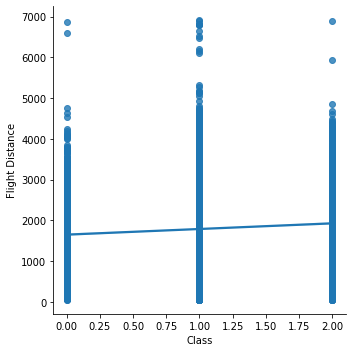

In [7]:
sns.lmplot(x="Class", y="Flight Distance", data=df)
plt.show()

As part of our preprocessing, we are going to use Min_max_scaler to scale the data.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaling = MinMaxScaler()
df = scaling.fit_transform(df)
df = pd.DataFrame(df, columns=col)





In [ ]:
import numpy as np

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
clean_dataset(df)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,0.0,1.0,0.0,0.538462,1.0,0.5,0.355166,0.6,0.8,0.4,...,1.0,1.0,0.8,0.8,0.75,0.6,0.8,1.0,0.000000,0.000000
1,1.0,1.0,1.0,0.384615,0.0,0.0,0.228083,0.8,0.8,0.8,...,0.4,0.4,0.8,0.8,0.75,1.0,0.8,0.4,0.007538,0.000631
2,1.0,0.0,0.0,0.461538,0.0,0.0,0.247066,0.0,0.0,0.0,...,0.4,0.2,0.2,0.2,0.00,1.0,0.2,0.2,0.000000,0.000000
3,0.0,1.0,0.0,0.512821,1.0,0.5,0.160267,0.2,0.6,0.2,...,0.6,0.6,1.0,0.6,0.50,1.0,0.2,0.6,0.009422,0.007576
4,1.0,1.0,0.0,0.628205,0.0,0.0,0.521664,0.4,0.8,0.4,...,0.6,1.0,1.0,1.0,1.00,0.2,1.0,1.0,0.010050,0.004419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.0,0.0,0.0,0.230769,1.0,0.5,0.414867,0.4,0.6,0.6,...,0.4,0.4,0.8,0.8,1.00,0.6,0.4,0.4,0.023241,0.013258
99996,1.0,1.0,1.0,0.192308,0.0,0.0,0.261701,0.0,0.0,0.0,...,0.6,0.6,1.0,0.4,0.75,1.0,1.0,0.6,0.050879,0.059343
99997,1.0,1.0,0.0,0.602564,0.0,0.0,0.192581,0.8,0.8,0.8,...,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,0.028894,0.033460
99998,1.0,0.0,0.0,0.564103,0.0,0.0,0.077525,0.6,0.6,0.6,...,0.8,1.0,1.0,1.0,1.00,1.0,1.0,1.0,0.000000,0.000000


In [ ]:
df.head()


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,0.0,1.0,0.0,0.538462,1.0,0.5,0.355166,0.6,0.8,0.4,...,1.0,1.0,0.8,0.8,0.75,0.6,0.8,1.0,0.000000,0.000000
1,1.0,1.0,1.0,0.384615,0.0,0.0,0.228083,0.8,0.8,0.8,...,0.4,0.4,0.8,0.8,0.75,1.0,0.8,0.4,0.007538,0.000631
2,1.0,0.0,0.0,0.461538,0.0,0.0,0.247066,0.0,0.0,0.0,...,0.4,0.2,0.2,0.2,0.00,1.0,0.2,0.2,0.000000,0.000000
3,0.0,1.0,0.0,0.512821,1.0,0.5,0.160267,0.2,0.6,0.2,...,0.6,0.6,1.0,0.6,0.50,1.0,0.2,0.6,0.009422,0.007576
4,1.0,1.0,0.0,0.628205,0.0,0.0,0.521664,0.4,0.8,0.4,...,0.6,1.0,1.0,1.0,1.00,0.2,1.0,1.0,0.010050,0.004419


In [ ]:
df_normal.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
120217,1,0,0,15,0,2,2303,5,4,4,...,5,5,5,3,3,2,4,5,1,7.0
54110,0,1,1,27,0,0,2229,3,3,3,...,2,2,4,1,3,3,3,2,0,0.0
14042,1,0,0,69,1,2,690,5,5,5,...,4,4,5,5,4,4,4,4,11,0.0
109758,1,0,0,38,0,0,1914,5,5,5,...,5,5,5,4,5,4,5,4,0,0.0
117121,1,0,0,45,0,0,2465,5,5,5,...,5,4,2,3,4,5,4,5,1,9.0


Splitting dataset into features and target

In [ ]:
features=df.drop(['satisfaction'] , axis=1)
target = df.satisfaction

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=10)


Initially we will use the Logistic regresion and then we will find its accuracy

In [ ]:
# logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression()

In [ ]:
# print accuracy
print('Accuracy of logistic regression classifier on training set:')
print(logreg.score(X_train, y_train))
classs=classification_report(y_train,logreg.predict(X_train))
print(classs)

Accuracy of logistic regression classifier on training set:
0.8373262645078091
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82     31656
         1.0       0.85      0.85      0.85     38134

    accuracy                           0.84     69790
   macro avg       0.84      0.84      0.84     69790
weighted avg       0.84      0.84      0.84     69790



Using Logistic Regression we are getting accuracy of 0.8

## SVM algorithm
Next we are going to use Support Vector Machine. Here we have already applied min_max_scaler to the data. And hence our model ran very quickly.

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print('Accuracy of SVM classifier on test set:')
print(clf.score(X_test, y_test))
classs=classification_report(y_test,y_pred)
print(classs)


Accuracy of SVM classifier on test set:
0.8365818595165658
              precision    recall  f1-score   support

         0.0       0.82      0.83      0.82     13583
         1.0       0.85      0.84      0.85     16328

    accuracy                           0.84     29911
   macro avg       0.84      0.84      0.84     29911
weighted avg       0.84      0.84      0.84     29911



We got accuracy of 0.8 with the SVM model. Now we will try with PCA.

Training a new model With PCA and setting the n_components as 14, i have set it as 14 because when i ran earlier as 0.9, it gave 14 components

In [ ]:
# We will try applying PCA for dimensionality reduction

pca = PCA(n_components=14)
a=pca.fit(features)
pca_array=pca.transform(features)
pca_df=pd.DataFrame(pca_array)
pca_df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.237176,0.800685,-0.448581,0.392148,0.042320,0.406420,0.349186,0.030702,-0.056996,0.126241,0.082650,-0.069283,-0.007156,-0.088042
1,0.442363,-0.385299,-0.458239,-0.567017,-0.672223,0.083904,-0.425646,-0.365894,0.002899,0.154559,0.114407,-0.156841,-0.052292,-0.085314
2,1.099432,-0.454146,0.900784,0.344077,0.673504,-0.643370,-0.148664,-0.517534,0.179566,0.004095,-0.047582,0.198007,0.210393,-0.059906
3,0.577877,0.824093,-0.056740,0.601977,0.050560,-0.038404,0.034137,-0.327885,0.224060,0.113576,0.202557,-0.316927,0.216293,-0.143048
4,-0.202424,-0.184394,-0.788343,0.280148,-0.135011,-0.319855,0.186779,0.391363,-0.256295,-0.007215,0.136917,-0.283884,-0.314262,0.216584


In [ ]:
pca_df['y']=df.satisfaction
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,y
0,-0.237176,0.800685,-0.448581,0.392148,0.042320,0.406420,0.349186,0.030702,-0.056996,0.126241,0.082650,-0.069283,-0.007156,-0.088042,0.0
1,0.442363,-0.385299,-0.458239,-0.567017,-0.672223,0.083904,-0.425646,-0.365894,0.002899,0.154559,0.114407,-0.156841,-0.052292,-0.085314,1.0
2,1.099432,-0.454146,0.900784,0.344077,0.673504,-0.643370,-0.148664,-0.517534,0.179566,0.004095,-0.047582,0.198007,0.210393,-0.059906,1.0
3,0.577877,0.824093,-0.056740,0.601977,0.050560,-0.038404,0.034137,-0.327885,0.224060,0.113576,0.202557,-0.316927,0.216293,-0.143048,0.0
4,-0.202424,-0.184394,-0.788343,0.280148,-0.135011,-0.319855,0.186779,0.391363,-0.256295,-0.007215,0.136917,-0.283884,-0.314262,0.216584,1.0


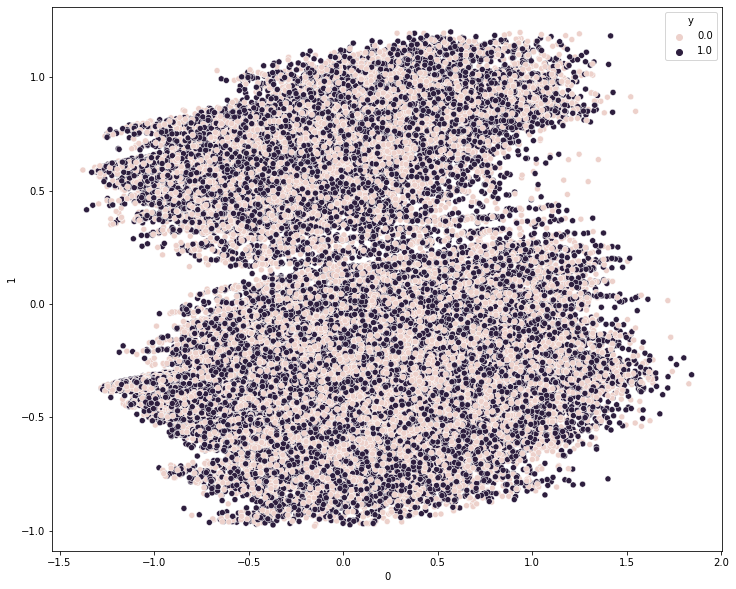

In [ ]:
# scatter plot of the data
plt.rcParams['figure.figsize'] = (12, 10)
sns.scatterplot(x=0, y=1, hue='y', data=pca_df)



In [ ]:
import numpy as np

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
clean_dataset(pca_df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,y
0,-0.237176,0.800685,-0.448581,0.392148,0.042320,0.406420,0.349186,0.030702,-0.056996,0.126241,0.082650,-0.069283,-0.007156,-0.088042,0.0
1,0.442363,-0.385299,-0.458239,-0.567017,-0.672223,0.083904,-0.425646,-0.365894,0.002899,0.154559,0.114407,-0.156841,-0.052292,-0.085314,1.0
2,1.099432,-0.454146,0.900784,0.344077,0.673504,-0.643370,-0.148664,-0.517534,0.179566,0.004095,-0.047582,0.198007,0.210393,-0.059906,1.0
3,0.577877,0.824093,-0.056740,0.601977,0.050560,-0.038404,0.034137,-0.327885,0.224060,0.113576,0.202557,-0.316927,0.216293,-0.143048,0.0
4,-0.202424,-0.184394,-0.788343,0.280148,-0.135011,-0.319855,0.186779,0.391363,-0.256295,-0.007215,0.136917,-0.283884,-0.314262,0.216584,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99696,0.026365,0.594059,0.754179,0.021538,-0.311340,-0.299414,-0.044141,-0.020037,-0.171994,-0.016815,-0.194463,0.058264,-0.044592,0.068012,0.0
99697,0.976581,-0.611508,-0.298633,0.790229,-0.649555,0.257957,0.186296,-0.486257,-0.049822,-0.141238,0.110075,0.057426,0.405641,-0.045771,1.0
99698,-0.685992,-0.155327,-0.989735,-0.045351,-0.105988,-0.016722,0.112321,-0.083891,0.181813,0.085665,0.055169,0.055203,0.061293,-0.164101,1.0
99699,-0.875601,-0.471478,-0.017078,0.193174,-0.183414,-0.328364,-0.051955,-0.085767,0.186419,0.031413,0.092498,0.048261,-0.030295,0.027413,1.0


In [ ]:
# train_test split of pca_df
features_pca=pca_df.drop(['y'] , axis=1)
target_pca = pca_df.y
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(features_pca, target_pca, test_size=0.3, random_state=10)

In [ ]:
from sklearn import svm
clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train_pca, y_train_pca)
y_pred_pca=clf2.predict(X_test_pca)
print('Accuracy of SVM classifier on test set:')
print(clf2.score(X_test_pca, y_test_pca))
classs=classification_report(y_test_pca,y_pred_pca)
print(classs)




Accuracy of SVM classifier on test set:
0.5480701519063746
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     13477
         1.0       0.55      1.00      0.71     16344

    accuracy                           0.55     29821
   macro avg       0.27      0.50      0.35     29821
weighted avg       0.30      0.55      0.39     29821



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


When we run SVM with PCA with n_components as 14, we got accuracy of 0.53 which is very less.

Setting the component to be set as 10.

In [ ]:
pca = PCA(n_components=10)
pca.fit(features)
pca_array=pca.transform(features)
pca_df2=pd.DataFrame(pca_array)
pca_df2

,0,1,2,3,4,5,6,7,8,9
0,-0.237176,0.800685,-0.448581,0.392148,0.042320,0.406420,0.349186,0.030702,-0.056996,0.126241
1,0.442363,-0.385299,-0.458239,-0.567017,-0.672223,0.083904,-0.425646,-0.365894,0.002899,0.154559
2,1.099432,-0.454146,0.900784,0.344077,0.673504,-0.643370,-0.148664,-0.517534,0.179566,0.004095
3,0.577877,0.824093,-0.056740,0.601977,0.050560,-0.038404,0.034137,-0.327885,0.224060,0.113576
4,-0.202424,-0.184394,-0.788343,0.280148,-0.135011,-0.319855,0.186779,0.391363,-0.256295,-0.007215
...,...,...,...,...,...,...,...,...,...,...
99696,0.026365,0.594059,0.754179,0.021538,-0.311340,-0.299414,-0.044141,-0.020037,-0.171994,-0.016815
99697,0.976581,-0.611508,-0.298633,0.790229,-0.649555,0.257957,0.186296,-0.486257,-0.049822,-0.141238
99698,-0.685992,-0.155327,-0.989735,-0.045351,-0.105988,-0.016722,0.112321,-0.083891,0.181813,0.085665
99699,-0.875601,-0.471478,-0.017078,0.193174,-0.183414,-0.328364,-0.051955,-0.085767,0.186419,0.031413


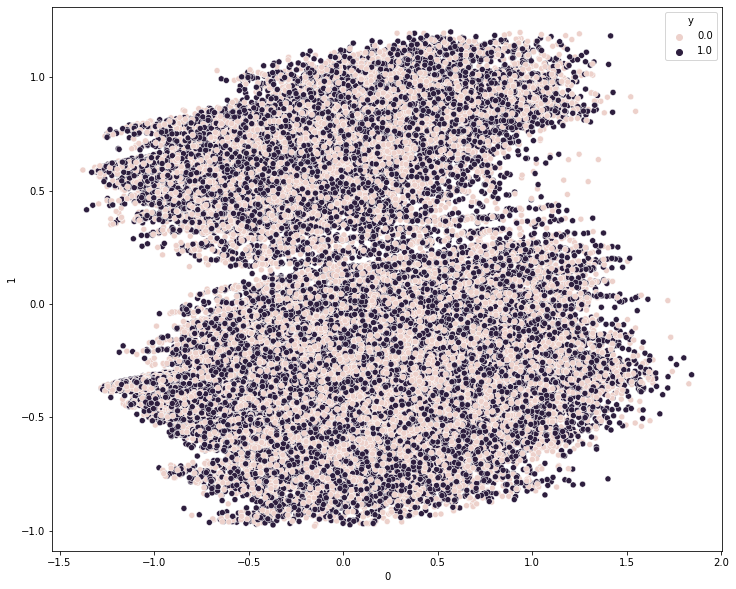

In [ ]:
# scatter plot of the data
# scatter plot of the data
pca_df2_full=pd.concat([pca_df2,target_pca],axis=1)


plt.rcParams['figure.figsize'] = (12, 10)
sns.scatterplot(x=0, y=1, hue='y', data=pca_df2_full)
# pca_df2_full

In [ ]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(pca_df2, target, test_size=0.3, random_state=10)
# running svm
clf3 = svm.SVC(kernel='linear')
clf3.fit(x_train2, y_train2)
y_pred_pca2=clf3.predict(x_test2)
print('Accuracy of SVM classifier on test set:')
print(clf3.score(x_test2, y_test2))
classs=classification_report(y_test2,y_pred_pca2)
print(classs)


Accuracy of SVM classifier on test set:
0.8280900003343251
              precision    recall  f1-score   support

         0.0       0.81      0.82      0.81     13583
         1.0       0.85      0.84      0.84     16328

    accuracy                           0.83     29911
   macro avg       0.83      0.83      0.83     29911
weighted avg       0.83      0.83      0.83     29911



When we run with PCA with n_components as 10, we got accuracy of 0.82

Now we will try to run our code without PCA or min_max_scaler


### IMPORTANT
Earlier when I ran my code on COLAB i got 98% accuracy. But when I ran it on my local machine, my machine kept running and I was unable to record that accuracy, hence i have done sampling and it has affected the accuracy.

In [ ]:
# # do sampling for df_normal
# df_normal= df_normal.sample(7000,random_state=10)
df_normal

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
120217,1,0,0,15,0,2,2303,5,4,4,...,5,5,5,3,3,2,4,5,1,7.0
54110,0,1,1,27,0,0,2229,3,3,3,...,2,2,4,1,3,3,3,2,0,0.0
14042,1,0,0,69,1,2,690,5,5,5,...,4,4,5,5,4,4,4,4,11,0.0
109758,1,0,0,38,0,0,1914,5,5,5,...,5,5,5,4,5,4,5,4,0,0.0
117121,1,0,0,45,0,0,2465,5,5,5,...,5,4,2,3,4,5,4,5,1,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99855,1,1,0,47,0,0,2891,1,1,1,...,5,4,4,4,4,4,4,4,0,0.0
66212,0,0,0,51,0,0,1124,1,3,3,...,3,1,1,1,1,4,1,4,2,6.0
87590,1,1,0,48,0,0,509,5,5,5,...,4,3,3,4,3,2,3,5,28,30.0
124487,1,0,0,36,0,0,207,2,2,2,...,4,5,5,5,5,5,5,4,54,36.0


In [ ]:
# svm using df_normal
clean_dataset(df_normal)
feature2=df_normal.drop(['satisfaction'] , axis=1)
target2 = df_normal.satisfaction
x_train3, x_test3, y_train3, y_test3 = train_test_split(feature2, target2, test_size=0.3, random_state=10)
# running svm
clf4 = svm.SVC(kernel='linear')
clf4.fit(x_train3, y_train3)
y_pred_pca3=clf4.predict(x_test3)
print('Accuracy of SVM classifier on test set:')
print(clf4.score(x_test3, y_test3))
classs=classification_report(y_test3,y_pred_pca3)
print(classs)


Accuracy of SVM classifier on test set:
0.8389870998566651
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       956
           1       0.84      0.86      0.85      1137

    accuracy                           0.84      2093
   macro avg       0.84      0.84      0.84      2093
weighted avg       0.84      0.84      0.84      2093



In [ ]:
df_normal.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [ ]:
# Taking user input
arr=[]
arr.append(int(input('Gender: Gender of the passengers (Female -1 , Male-0:')))
arr.append(int(input('Customer Type: The customer type (Loyal customer 0, disloyal customer 1)')))
arr.append(int(input('Age: The actual age of the passengers')))
arr.append(int(input('Type of Travel: Purpose of the flight of the passengers (Personal Travel 0, Business Travel 1)')))
arr.append(int(input('Class: Travel class in the plane of the passengers (Business 0, Eco1, Eco Plus 2)')))
arr.append(int(input('Flight distance: The flight distance of this journey')))
arr.append(int(input('Seat comfort: Satisfaction level of Seat comfort')))
arr.append(int(input('Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient')))
arr.append(int(input('Food and drink: Satisfaction level of Food and drink')))
arr.append(int(input('Gate location: Satisfaction level of Gate location')))
arr.append(int(input('Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)')))
arr.append(int(input('Inflight entertainment: Satisfaction level of inflight entertainment')))
arr.append(int(input('online support: Satisfaction level of inflight service')))
arr.append(int(input('Ease of Online booking: Satisfaction level of online booking')))
arr.append(int(input('On-board service: Satisfaction level of On-board service')))
arr.append(int(input('Leg room service: Satisfaction level of Leg room service')))
arr.append(int(input('Baggage handling: Satisfaction level of baggage handling')))
arr.append(int(input('Check-in service: Satisfaction level of Check-in service')))
arr.append(int(input('Cleanliness: Satisfaction level of Cleanliness')))
arr.append(int(input('Online boarding: Satisfaction level of online boarding')))
arr.append(int(input('Departure Delay in Minutes: Minutes delayed when departure')))
arr.append(int(input('Arrival Delay in Minutes: Minutes delayed when Arrival')))


In [ ]:
arr=np.array(arr)
arr=arr.reshape(1,-1)

In [ ]:
testcase=pd.DataFrame(arr,columns=[ 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'])

In [ ]:

new_pred=clf4.predict(testcase)
print('From our model we predict the customer to be',new_pred)  
if new_pred==0:
    print('The customer is not satisfied')
else:
    'The customer is satisfied'    

# Conclusion and Learnings/Experience
The last lab has helped in understanding Machine learning alot. I have learnt on how to choose different models and how even changing small things will result in a better model or a worser one. This lab has helped me to understand the importance of preprocessing and feature selection.
In this lab I have faced many difficulties as SVM was not executing and hence I had to do sampling which did not give me the best result.